#  Predicting  the effect of Telecome sector on GPP  
This notebook demonstrates an ecomomic dataset, including data exploration, feature engineering, model building to predict GDP using (Ridge -VAR -Xgboost -RandomForest) , and evaluation. 

###### The dataset contains 73 records with the following features:

* years: The time period (quarterly data).

* GDP: The target variable representing the GDP value.

* EXP__INF: Expenditure or Inflation indicator.

* GDP_TELE: GDP from telecommunication.

* N_INTE_USERS: Number of Internet users.

* N_MOBILE__SUBS: Number of mobile subscribers.

* POPULATION: Population count

In [30]:

# Import necessary libraries
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:

# Load the dataset
data = pd.read_csv("da.csv",index_col=0)
data.head(5)
    

,GDP,EXP__INF,GDP_TELE,N_INTE_USERS,N_MOBILE__SUBS,POPULATION
years,,,,,,
2002Q1,93.4,485.0,542.0,150.0,449.0,4246.0
2002Q2,87.4,527.0,554.0,168.0,482.0,4278.0
2002Q3,87.2,568.0,566.0,185.0,515.0,4310.0
2002Q4,86.5,609.0,577.0,202.0,547.0,4343.0
2003Q1,96.4,651.0,589.0,220.0,580.0,4375.0


### Data Exploration
We'll explore the dataset to understand the distribution of features and the target variable.

In [3]:
# information about this data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 2002Q1 to 2020Q1
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GDP             73 non-null     float64
 1   EXP__INF        73 non-null     float64
 2   GDP_TELE        73 non-null     float64
 3   N_INTE_USERS    73 non-null     float64
 4   N_MOBILE__SUBS  73 non-null     float64
 5   POPULATION      73 non-null     float64
dtypes: float64(6)
memory usage: 4.0+ KB


In [4]:
# Summary statistics
data.describe()

,GDP,EXP__INF,GDP_TELE,N_INTE_USERS,N_MOBILE__SUBS,POPULATION
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,438.186301,1522.465753,1027.575342,1216.356164,6378.095890,5266.205479
std,306.720890,463.117008,385.610948,1111.161222,3709.542672,567.324739
min,86.500000,485.000000,542.000000,150.000000,449.000000,4246.000000
25%,183.100000,1340.000000,727.000000,440.000000,2405.000000,4801.000000
50%,349.500000,1684.000000,979.000000,762.000000,8343.000000,5291.000000
75%,647.600000,1891.000000,1085.000000,1615.000000,9536.000000,5737.000000
max,1024.400000,1968.000000,2111.000000,3620.000000,10296.000000,6217.000000


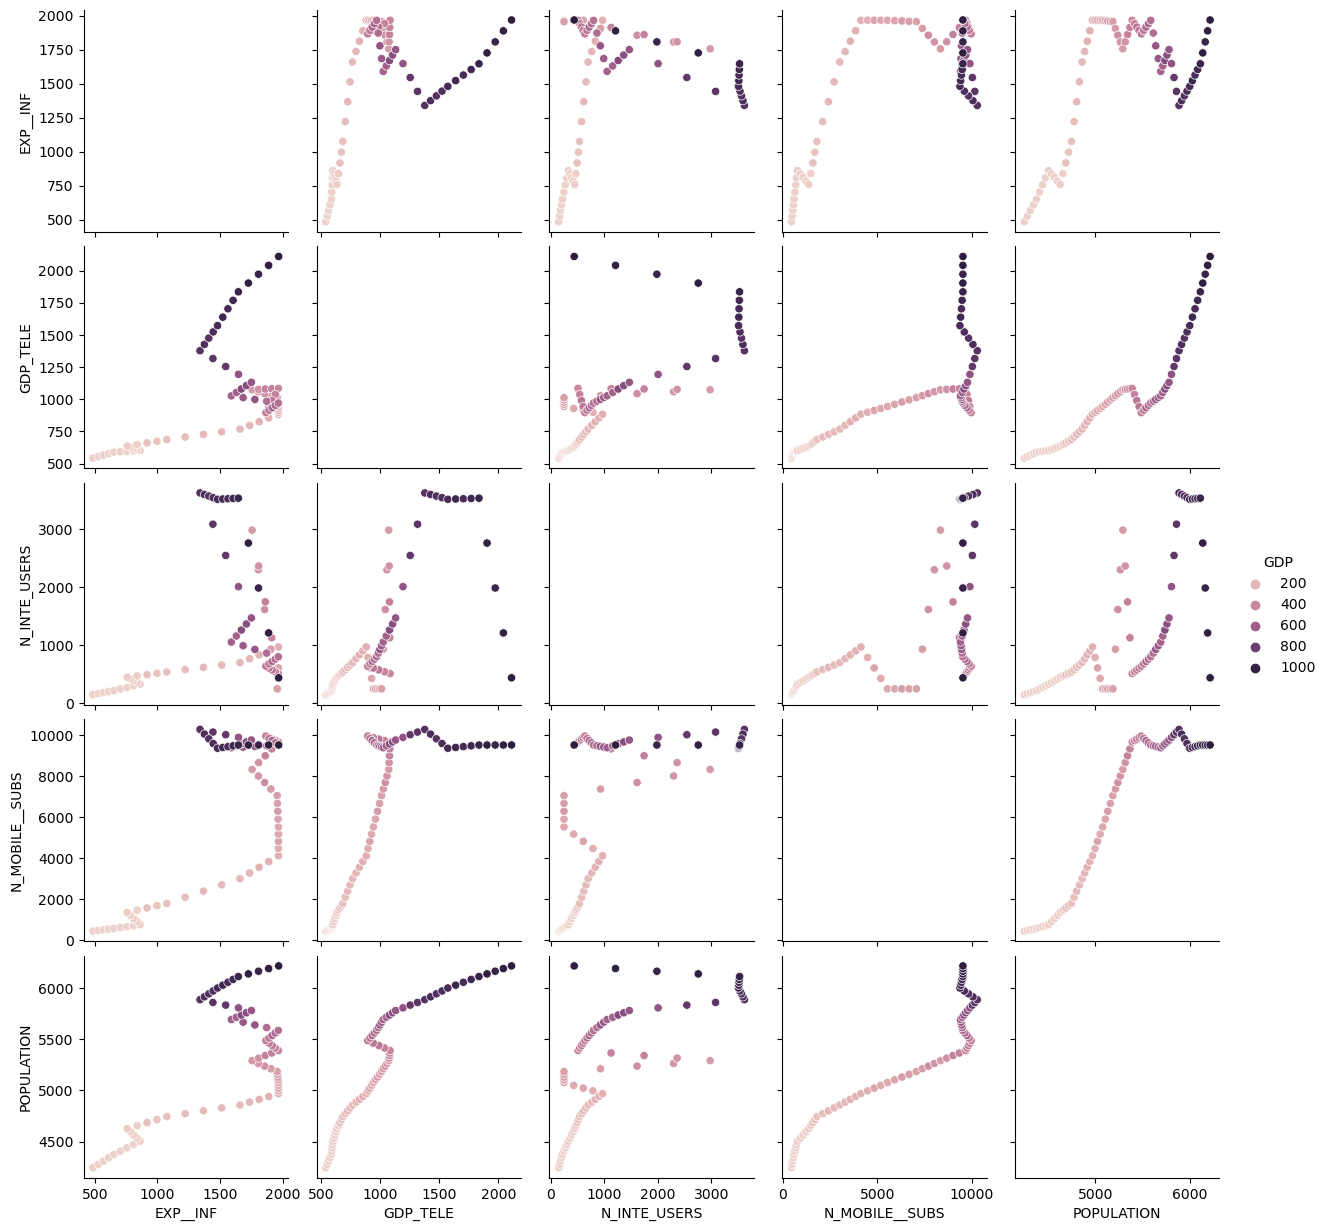

In [5]:
# Distribution plots
sns.pairplot(data, hue='GDP')

#### This pairplot provides a visual summary of the relationships between all the numerical variables 
* Relationship Between Features: Each scatter plot shows how two variables interact. For instance, if you look at the scatter plot between GDP and POPULATION, you might see a trend where higher population sizes correspond to higher GDP values, indicating a positive correlation.

* Patterns: If the points in the scatter plot are scattered without any clear pattern, it suggests a weak or no relationship between the two variables. On the other hand, if there's a visible trend (e.g., linear, exponential), it suggests a strong relationship. For example, if the scatter plot between GDP and EXP__INF shows a downward or upward slope, it would suggest that changes in EXP__INF are associated with changes in GDP.

* Outliers: Any data points that fall far from the main cluster of points could indicate outliers. These outliers might need special attention as they can influence the results of your model.

In [41]:
data.corr()

,GDP,EXP__INF,GDP_TELE,N_INTE_USERS,N_MOBILE__SUBS,POPULATION
GDP,1.000000,0.433644,0.929082,0.767027,0.836807,0.962268
EXP__INF,0.433644,1.000000,0.486621,0.187273,0.736417,0.630413
GDP_TELE,0.929082,0.486621,1.000000,0.720897,0.742562,0.902319
N_INTE_USERS,0.767027,0.187273,0.720897,1.000000,0.594661,0.710061
N_MOBILE__SUBS,0.836807,0.736417,0.742562,0.594661,1.000000,0.932135
POPULATION,0.962268,0.630413,0.902319,0.710061,0.932135,1.000000


## Data Cleaning
We'll check for missing values and handle them appropriately.

In [6]:
# Check for missing values
data.isnull().sum()

GDP               0
EXP__INF          0
GDP_TELE          0
N_INTE_USERS      0
N_MOBILE__SUBS    0
POPULATION        0
dtype: int64

## Modeling
We'll split the data into training and testing sets for prediction using: 
* Random Forest model
* Gradient Boosting Regressor,
* Xgboost .

In [7]:
# Define features and target variable
X = data.drop(columns=('GDP'))
y = data['GDP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

(58, 5)

In [18]:
# Create pipelines for each model with StandardScaler
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', rf_model)
])

gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', gb_model)
])

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', xgb_model)
])
    

In [19]:
# Train the models
rf_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

# Make predictions
rf_pred = rf_pipeline.predict(X_test)
gb_pred = gb_pipeline.predict(X_test)
xgb_pred = xgb_pipeline.predict(X_test)

In [33]:
# Evaluate the models
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

In [34]:
# Compile the results into a DataFrame for comparison
results = {
    'Model': ['Random Forest', 'Gradient Boosting', 'XGBoost'],
    'RMSE': [rf_rmse, gb_rmse, xgb_rmse],
    'MSE': [rf_mse, gb_mse, xgb_mse],
    'MAE': [rf_mae, gb_mae, xgb_mae]
}

results_df = pd.DataFrame(results)

# Sort the DataFrame by MSE in ascending order
results_df_sorted = results_df.sort_values(by='RMSE', ascending=True)

# Display the sorted DataFrame
results_df_sorted

,Model,RMSE,MSE,MAE
1,Gradient Boosting,17.006368,289.216559,12.215108
0,Random Forest,20.592569,424.053892,13.731267
2,XGBoost,21.702044,470.978701,13.601330


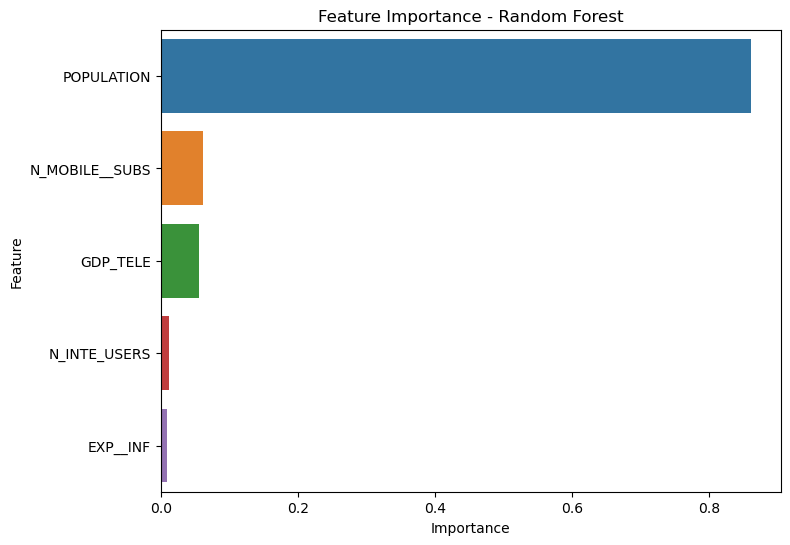

In [40]:

# Visualize the feature importance for Random Forest
rf_importances = rf_model.feature_importances_
features = X.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': rf_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importance - Random Forest')
plt.show()
    

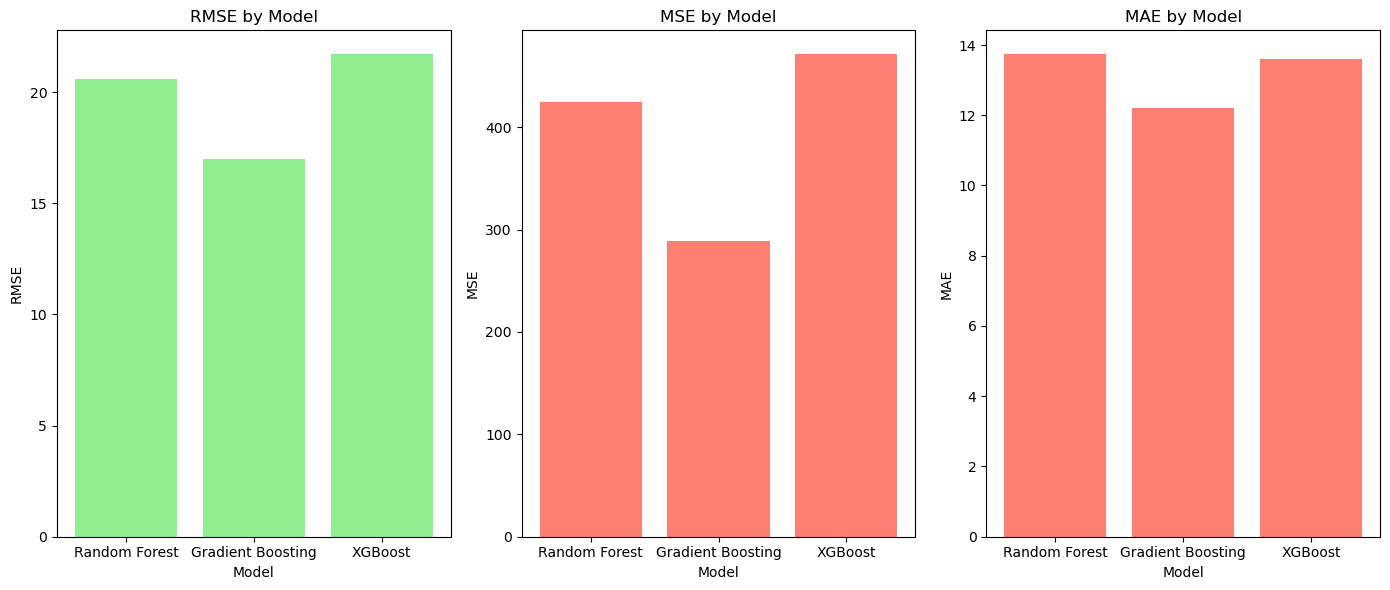

In [39]:
# Plot the results

# Function to add labels on top of bars
def add_labels(axes):
    for rect in axes.patches:
        height = rect.get_height()
        axes.annotate(f'{height:.2f}',
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')

plt.figure(figsize=(14, 6))

# Plotting RMSE
plt.subplot(1, 3, 1)
plt.bar(results_df['Model'], results_df['RMSE'], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE by Model')

# Plotting MSE
plt.subplot(1, 3, 2)
plt.bar(results_df['Model'], results_df['MSE'], color='salmon')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE by Model')

# Plotting MAE
plt.subplot(1, 3, 3)
plt.bar(results_df['Model'], results_df['MAE'], color='salmon')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE by Model')
plt.tight_layout()
plt.show()

# conclusion
* Best Model: Gradient Boosting consistently outperforms Random Forest and XGBoost across all three metrics (RMSE, MSE, and MAE). This suggests that Gradient Boosting provides the most accurate predictions with the smallest errors.
* Comparison Between Models:
Random Forest and XGBoost show similar performance, with XGBoost having slightly worse performance in terms of RMSE and MSE, but similar MAE to Random Forest.
Gradient Boosting is the clear winner, indicating it is better suited for this particular dataset.